In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('C://Users//Pallavi//Desktop//Forest_Fire_Detection//final_code/p4ds.csv', sep = ',')

In [2]:
data.head()

,S.No.,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,label,Unnamed: 11,Image
0,1,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,NaN,fire.1
1,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,NaN,non_fire.1
2,3,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,NaN,non_fire.2
3,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,NaN,fire.2
4,5,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1,NaN,fire.5


In [3]:
sensor_data = data[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']]

In [4]:
label =  data[['label']]


In [5]:
from sklearn.model_selection import train_test_split
x_train_s, x_test_s, x_train_img, x_test_img, y_train_l, y_test_l =  train_test_split(sensor_data, data['Image'], label, test_size = 0.3, random_state = 42)

In [6]:
from sklearn import preprocessing
le =  preprocessing.LabelEncoder()
le.fit(label)
print(le.classes_)

[0 1 2]


C:\Users\Pallavi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [7]:

from tensorflow.keras.utils import to_categorical

y_train_index = le.transform(y_train_l)
y_test_index = le.transform(y_test_l)

y_train_final  =  to_categorical(y_train_index)
y_test_final  =  to_categorical(y_test_index)

C:\Users\Pallavi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [8]:
y_train_final

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [9]:
x_train_s.shape

(361, 9)

In [10]:
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Input

sequence_input = Input(shape=(9,), dtype='int32') 
Dense1_s = Dense(128, activation='relu', input_dim =x_train_s.shape[1] )(sequence_input)
Dense2_s = Dense(64, activation='relu')(Dense1_s)

output_s = Dense(3, activation='softmax')(Dense2_s)
model_sensor = Model(inputs = sequence_input, outputs = output_s)
model_sensor.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 9,731
Trainable params: 9,731
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_sensor.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [12]:
imgModel = model_sensor.fit(x_train_s,y_train_final, validation_data=(x_test_s,y_test_final), epochs= 80, verbose= 2)

Epoch 1/80
12/12 - 1s - loss: 9.4878 - accuracy: 0.4571 - val_loss: 5.8992 - val_accuracy: 0.5256
Epoch 2/80
12/12 - 0s - loss: 4.1189 - accuracy: 0.6039 - val_loss: 3.1983 - val_accuracy: 0.5449
Epoch 3/80
12/12 - 0s - loss: 2.1311 - accuracy: 0.6510 - val_loss: 1.3833 - val_accuracy: 0.6410
Epoch 4/80
12/12 - 0s - loss: 1.3010 - accuracy: 0.6676 - val_loss: 0.9872 - val_accuracy: 0.7115
Epoch 5/80
12/12 - 0s - loss: 0.7619 - accuracy: 0.6870 - val_loss: 0.7287 - val_accuracy: 0.6987
Epoch 6/80
12/12 - 0s - loss: 0.6730 - accuracy: 0.7147 - val_loss: 0.8703 - val_accuracy: 0.6090
Epoch 7/80
12/12 - 0s - loss: 0.6335 - accuracy: 0.7258 - val_loss: 0.6150 - val_accuracy: 0.6603
Epoch 8/80
12/12 - 0s - loss: 0.6103 - accuracy: 0.7175 - val_loss: 0.6583 - val_accuracy: 0.6538
Epoch 9/80
12/12 - 0s - loss: 0.6541 - accuracy: 0.7064 - val_loss: 0.5510 - val_accuracy: 0.7372
Epoch 10/80
12/12 - 0s - loss: 0.5054 - accuracy: 0.7618 - val_loss: 0.9690 - val_accuracy: 0.5641
Epoch 11/80
12/12 -

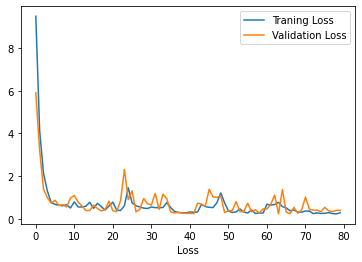

In [13]:
from keras.models import Sequential
train_loss = imgModel.history['loss']
val_loss   = imgModel.history['val_loss']
train_acc  = imgModel.history['accuracy']
val_acc    = imgModel.history['val_accuracy']
xc         = range(80)

plt.plot(xc, train_loss, label = "Traning Loss")
plt.plot(xc, val_loss,label="Validation Loss")
plt.xlabel('No. of epochs')
plt.xlabel('Loss')

plt.legend()
plt.savefig('imgloss.png')

plt.show()


In [14]:
y_pred = model_sensor.predict(x_test_s)

In [15]:
y_classes_act = [np.argmax(y, axis=None, out=None) for y in y_test_final]
y_classes_pred = [np.argmax(y, axis=None, out=None) for y in y_pred]

In [16]:
# y_classes_pred

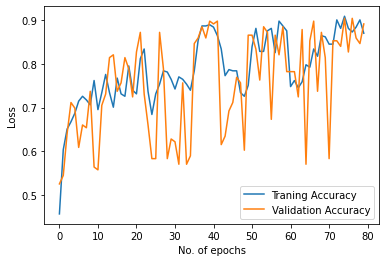

In [17]:
from keras.models import Sequential
train_loss = imgModel.history['loss']
val_loss   = imgModel.history['val_loss']
train_acc  = imgModel.history['accuracy']
val_acc    = imgModel.history['val_accuracy']
xc         = range(80)

plt.plot(xc, train_acc, label = "Traning Accuracy")
plt.plot(xc, val_acc,label="Validation Accuracy")
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('imgacc.png')

plt.show()


In [18]:
# Importing the dependancies
from sklearn.metrics import classification_report, confusion_matrix


confusion_matrix(y_classes_act, y_classes_pred)

array([[68,  0,  1],
       [ 1, 33,  0],
       [15,  0, 38]], dtype=int64)

In [19]:
from sklearn.metrics import precision_score, recall_score,f1_score

precision_score(y_classes_act, y_classes_pred, average='macro')                          
                    

0.9279609279609279

In [20]:
f1_score(y_classes_act, y_classes_pred, average='macro')                      

0.9000168240920998

In [21]:
recall_score(y_classes_act, y_classes_pred, average='macro')          

0.8910255379154669

In [23]:
x_train_img.head()

311         fire.15
368        fire.113
23      non_fire.17
271    non_fire.206
299        fire.185
Name: Image, dtype: object

In [24]:
import re

In [25]:
import os
import cv2
import numpy as np

image_read_train = []
for imageid in x_train_img:
    print(imageid)

    fileidx = imageid+ '.png'
    image_path= os.path.join("C:\\Users\\Pallavi\\Desktop\\Forest_Fire_Detection\\final_code",fileidx)
    print(image_path)
    image_pixel = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_resize = cv2.resize(image_pixel, (64, 64))
    image_resize = image_resize.flatten()
    image_read_train.append(image_resize)

final_image_train = np.asarray(image_read_train)


fire.15
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.15.png
fire.113
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.113.png
non_fire.17
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.17.png
non_fire.206
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.206.png
fire.185
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.185.png
fire.121
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.121.png
non_fire.3
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.3.png
fire.70
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.70.png
non_fire.38
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.38.png
non_fire.137
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.137.png
fire.7
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.7.png
fire.256
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.256.png
fire.109
C:\User

non_fire.109
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.109.png
fire.151
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.151.png
non_fire.32
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.32.png
fire.31
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.31.png
non_fire.145
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.145.png
fire.230
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.230.png
fire.96
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.96.png
fire.162
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.162.png
non_fire.106
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.106.png
fire.18
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.18.png
fire.285
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.285.png
non_fire.90
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.90.png
fire.160
C

non_fire.26
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.26.png
non_fire.202
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.202.png
fire.42
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.42.png
non_fire.147
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.147.png
fire.248
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.248.png
non_fire.21
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.21.png
fire.194
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.194.png
non_fire.168
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.168.png
non_fire.195
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.195.png
fire.197
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.197.png
non_fire.211
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.211.png
fire.105
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fir

fire.173
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.173.png
fire.280
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.280.png
fire.71
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.71.png
non_fire.192
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.192.png
fire.8
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.8.png
non_fire.108
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.108.png
fire.79
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.79.png
fire.97
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.97.png
fire.99
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.99.png
non_fire.76
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.76.png
fire.119
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.119.png
non_fire.68
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.68.png
fire.245
C:\Users\Pallav

In [26]:
pwd

'C:\\Users\\Pallavi\\Desktop\\Forest_Fire_Detection'

In [27]:
print(x_test_img)

304        fire.196
501        fire.299
441        fire.218
153    non_fire.111
503        fire.305
           ...     
192    non_fire.140
66      non_fire.53
286    non_fire.209
422        fire.188
94      non_fire.73
Name: Image, Length: 156, dtype: object


In [28]:
import os
import cv2
import numpy as np

image_read_test = []
for imageid in x_test_img:
    

    fileidx = imageid+ '.png'
    image_path= os.path.join("C:\\Users\\Pallavi\\Desktop\\Forest_Fire_Detection\\final_code",fileidx)

    print(image_path)
    image_pixel = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_resize = cv2.resize(image_pixel, (64, 64))
    image_resize = image_resize.flatten()
    image_read_test.append(image_resize)
final_image_test = np.asarray(image_read_test)

C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.196.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.299.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.218.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.111.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.305.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.81.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.126.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.319.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.38.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.182.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.310.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.88.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.212.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.6

C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.172.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.241.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.176.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.77.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.56.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.25.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.85.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.190.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.159.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.179.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.48.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\fire.153.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\non_fire.18.png
C:\Users\Pallavi\Desktop\Forest_Fire_Detection\final_code\n

In [29]:
print(final_image_train.shape, final_image_test.shape)

(361, 4096) (156, 4096)


In [30]:
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Input
image_input = Input(shape=(4096,))


Dense1_i = Dense(1024, activation='relu')(image_input)
Dense2_i = Dense(64, activation='relu')(Dense1_i)
output_i = Dense(3, activation='softmax')(Dense2_i)

model_image = Model(inputs = image_input, outputs = output_i)
model_image.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4096)]            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dense_4 (Dense)              (None, 64)                65600     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 4,261,123
Trainable params: 4,261,123
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_image.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [32]:
seqModel =model_image.fit(final_image_train,y_train_final, validation_data=(final_image_test,y_test_final), epochs= 80, verbose= 2)


Epoch 1/80
12/12 - 1s - loss: 456.0967 - accuracy: 0.3296 - val_loss: 248.5082 - val_accuracy: 0.4487
Epoch 2/80
12/12 - 0s - loss: 200.6248 - accuracy: 0.4377 - val_loss: 88.8014 - val_accuracy: 0.5000
Epoch 3/80
12/12 - 0s - loss: 87.2327 - accuracy: 0.5263 - val_loss: 72.1993 - val_accuracy: 0.4231
Epoch 4/80
12/12 - 0s - loss: 57.0738 - accuracy: 0.5097 - val_loss: 57.7630 - val_accuracy: 0.5128
Epoch 5/80
12/12 - 0s - loss: 35.2963 - accuracy: 0.5623 - val_loss: 32.7626 - val_accuracy: 0.4487
Epoch 6/80
12/12 - 1s - loss: 17.8048 - accuracy: 0.6454 - val_loss: 42.3494 - val_accuracy: 0.3590
Epoch 7/80
12/12 - 0s - loss: 18.9369 - accuracy: 0.6205 - val_loss: 24.8846 - val_accuracy: 0.5705
Epoch 8/80
12/12 - 0s - loss: 23.6764 - accuracy: 0.6094 - val_loss: 26.1365 - val_accuracy: 0.4808
Epoch 9/80
12/12 - 0s - loss: 13.0971 - accuracy: 0.6814 - val_loss: 30.1121 - val_accuracy: 0.5385
Epoch 10/80
12/12 - 0s - loss: 15.8327 - accuracy: 0.6953 - val_loss: 23.4504 - val_accuracy: 0.5

In [33]:
y_pred_img = model_image.predict(final_image_test)

In [34]:
y_classes_act_img = [np.argmax(y, axis=None, out=None) for y in y_test_final]
y_classes_pred_img = [np.argmax(y, axis=None, out=None) for y in y_pred_img]

In [35]:
# Importing the dependancies
from sklearn.metrics import classification_report, confusion_matrix


confusion_matrix(y_classes_act_img, y_classes_pred_img)

array([[31, 14, 24],
       [ 7, 17, 10],
       [ 8, 13, 32]], dtype=int64)

In [36]:
precision_score(y_classes_act_img, y_classes_pred_img, average='macro')      

0.5150417215634607

In [37]:
f1_score(y_classes_act_img, y_classes_pred_img, average='macro') 

0.504280998910155

In [38]:
recall_score(y_classes_act_img, y_classes_pred_img, average='macro')

0.517682982408167

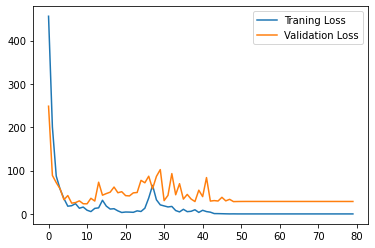

In [39]:
from keras.models import Sequential
train_loss = seqModel.history['loss']
val_loss   = seqModel.history['val_loss']
train_acc  = seqModel.history['accuracy']
val_acc    = seqModel.history['val_accuracy']
xc         = range(80)

plt.plot(xc, train_loss, label = "Traning Loss")
plt.plot(xc, val_loss,label="Validation Loss")
plt.legend()
plt.savefig('seqloss.png')

plt.show()


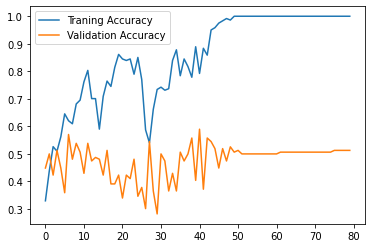

In [40]:
from keras.models import Sequential
train_loss = seqModel.history['loss']
val_loss   = seqModel.history['val_loss']
train_acc  = seqModel.history['accuracy']
val_acc    = seqModel.history['val_accuracy']
xc         = range(80)

plt.plot(xc, train_acc, label = "Traning Accuracy")
plt.plot(xc, val_acc,label="Validation Accuracy")
plt.legend()
plt.savefig('seqacc.png')

plt.show()


In [41]:
from keras.layers import Dense,Input,Dropout, concatenate,Concatenate
combined = concatenate([Dense2_s, Dense2_i])
combined5 = Dense(3, activation = 'softmax')(combined)

model_combined = Model(inputs = [sequence_input, image_input], outputs = combined5)

In [42]:
model_combined.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 9)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1280        input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 1024)         4195328     input_2[0][0]                    
____________________________________________________________________________________________

In [43]:
model_combined.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [44]:
MultiModel = model_combined.fit([x_train_s, final_image_train],y_train_final, validation_data=([x_test_s, final_image_test],y_test_final), epochs= 100, verbose= 2)

Epoch 1/100
12/12 - 1s - loss: 29.1127 - accuracy: 0.5291 - val_loss: 2.3963 - val_accuracy: 0.6538
Epoch 2/100
12/12 - 0s - loss: 2.3831 - accuracy: 0.6427 - val_loss: 1.9394 - val_accuracy: 0.6603
Epoch 3/100
12/12 - 0s - loss: 1.3993 - accuracy: 0.7091 - val_loss: 2.5038 - val_accuracy: 0.6667
Epoch 4/100
12/12 - 0s - loss: 1.3597 - accuracy: 0.6787 - val_loss: 1.0558 - val_accuracy: 0.7821
Epoch 5/100
12/12 - 1s - loss: 0.8157 - accuracy: 0.7507 - val_loss: 0.8248 - val_accuracy: 0.8205
Epoch 6/100
12/12 - 0s - loss: 0.5563 - accuracy: 0.8227 - val_loss: 0.6815 - val_accuracy: 0.8526
Epoch 7/100
12/12 - 0s - loss: 0.5873 - accuracy: 0.7230 - val_loss: 1.5545 - val_accuracy: 0.6923
Epoch 8/100
12/12 - 0s - loss: 0.8836 - accuracy: 0.6870 - val_loss: 1.2518 - val_accuracy: 0.7115
Epoch 9/100
12/12 - 0s - loss: 1.1508 - accuracy: 0.6759 - val_loss: 0.7256 - val_accuracy: 0.7885
Epoch 10/100
12/12 - 1s - loss: 0.8587 - accuracy: 0.7368 - val_loss: 0.9945 - val_accuracy: 0.6090
Epoch 11

12/12 - 0s - loss: 0.2109 - accuracy: 0.9141 - val_loss: 0.6120 - val_accuracy: 0.8462
Epoch 84/100
12/12 - 0s - loss: 0.2614 - accuracy: 0.9003 - val_loss: 0.4965 - val_accuracy: 0.8333
Epoch 85/100
12/12 - 0s - loss: 0.1948 - accuracy: 0.9252 - val_loss: 0.4744 - val_accuracy: 0.8910
Epoch 86/100
12/12 - 0s - loss: 0.2127 - accuracy: 0.9141 - val_loss: 0.6692 - val_accuracy: 0.7500
Epoch 87/100
12/12 - 0s - loss: 0.2586 - accuracy: 0.9003 - val_loss: 0.4986 - val_accuracy: 0.8910
Epoch 88/100
12/12 - 1s - loss: 0.2023 - accuracy: 0.9058 - val_loss: 0.4612 - val_accuracy: 0.8590
Epoch 89/100
12/12 - 0s - loss: 0.2149 - accuracy: 0.9169 - val_loss: 0.4977 - val_accuracy: 0.8782
Epoch 90/100
12/12 - 0s - loss: 0.2304 - accuracy: 0.8892 - val_loss: 0.4670 - val_accuracy: 0.8718
Epoch 91/100
12/12 - 0s - loss: 0.2022 - accuracy: 0.9169 - val_loss: 0.5059 - val_accuracy: 0.8397
Epoch 92/100
12/12 - 0s - loss: 0.2290 - accuracy: 0.9114 - val_loss: 0.6894 - val_accuracy: 0.8526
Epoch 93/100


In [45]:
y_pred_multi = model_combined.predict([x_test_s, final_image_test])

In [46]:
y_classes_act_multi = [np.argmax(y, axis=None, out=None) for y in y_test_final]
y_classes_pred_multi = [np.argmax(y, axis=None, out=None) for y in y_pred_multi]

In [47]:
# Importing the dependancies
from sklearn.metrics import classification_report, confusion_matrix


confusion_matrix(y_classes_act_multi, y_classes_pred_multi)

array([[67,  0,  2],
       [ 1, 33,  0],
       [14,  0, 39]], dtype=int64)

In [48]:
precision_score(y_classes_act_img, y_classes_pred_img, average='macro')      

0.5150417215634607

In [49]:
f1_score(y_classes_act_img, y_classes_pred_img, average='macro') 

0.504280998910155

In [50]:
recall_score(y_classes_act_img, y_classes_pred_img, average='macro')

0.517682982408167

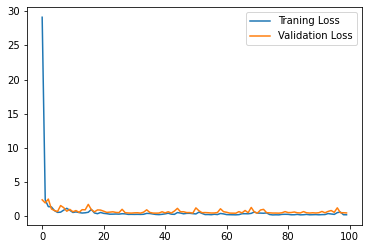

In [51]:
from keras.models import Sequential
train_loss = MultiModel.history['loss']
val_loss   = MultiModel.history['val_loss']
train_acc  = MultiModel.history['accuracy']
val_acc    = MultiModel.history['val_accuracy']
xc         = range(100)

plt.plot(xc, train_loss, label = "Traning Loss")
plt.plot(xc, val_loss,label="Validation Loss")
plt.legend()
plt.savefig('multiloss.png')

plt.show()


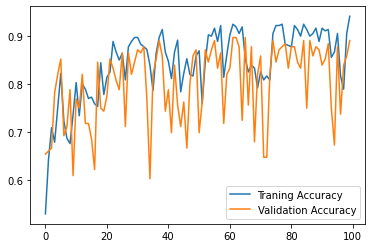

In [52]:
from keras.models import Sequential
train_loss = MultiModel.history['loss']
val_loss   = MultiModel.history['val_loss']
train_acc  = MultiModel.history['accuracy']
val_acc    = MultiModel.history['val_accuracy']
xc         = range(100)

plt.plot(xc, train_acc, label = "Traning Accuracy")
plt.plot(xc, val_acc,label="Validation Accuracy")
plt.legend()
plt.savefig('multiacc.png')

plt.show()
